In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [98]:
df_train  = pd.read_csv("data/train.csv")
df_sample = pd.read_csv("data/sample_submission.csv")
df_test   = pd.read_csv("data/train.csv")

labels = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
 'Obesity_Type_III' ,'Obesity_Type_II' ,'Overweight_Level_I',
 'Obesity_Type_I']

# drop id (not useful)
df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [99]:
# add BMI
df_train['BMI'] = (df_train['Weight'] / df_train['Height']**2)
# display(df_train)

In [100]:
numerical_cols   = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=[object]).columns.tolist()

num_numerical_cols = len(numerical_cols)
num_numerical_rows = num_numerical_cols // 4

num_categorical_cols = len(categorical_cols)
num_categorical_rows = num_categorical_cols // 4

In [101]:
from sklearn.model_selection import train_test_split

y = df_train['NObeyesdad']
x = df_train.copy().drop(columns=['NObeyesdad'])

categoricals_cols_no_result = categorical_cols.remove("NObeyesdad")
x = pd.get_dummies(x, columns=categoricals_cols_no_result, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def get_stats(predictions):
  result = {}
  result['acc_score'] = accuracy_score(y_test,predictions)
  result['prec_score'] = precision_score(y_test,predictions,average='macro')
  result['recall_score'] = recall_score(y_test,predictions,average='macro')
  result['f1_score'] = f1_score(y_test,predictions,average='macro')
  result['confusion_matrix'] = confusion_matrix(y_test,predictions)
  return result

In [103]:
print(df_train.shape)

(20758, 18)


In [104]:
# number of na
mv = df_train.isna().sum().sum()

# number of duplicates
dv = df_train.duplicated().sum()

# there are no NAs or Duplicates in the test dataset
print(mv)
print(dv)

0
0


In [105]:
display(df_train.describe(include=[np.number]).T, df_train.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000
BMI,20758.0,30.241842,8.333932,12.868541,24.088223,29.384757,37.011168,54.997991


,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


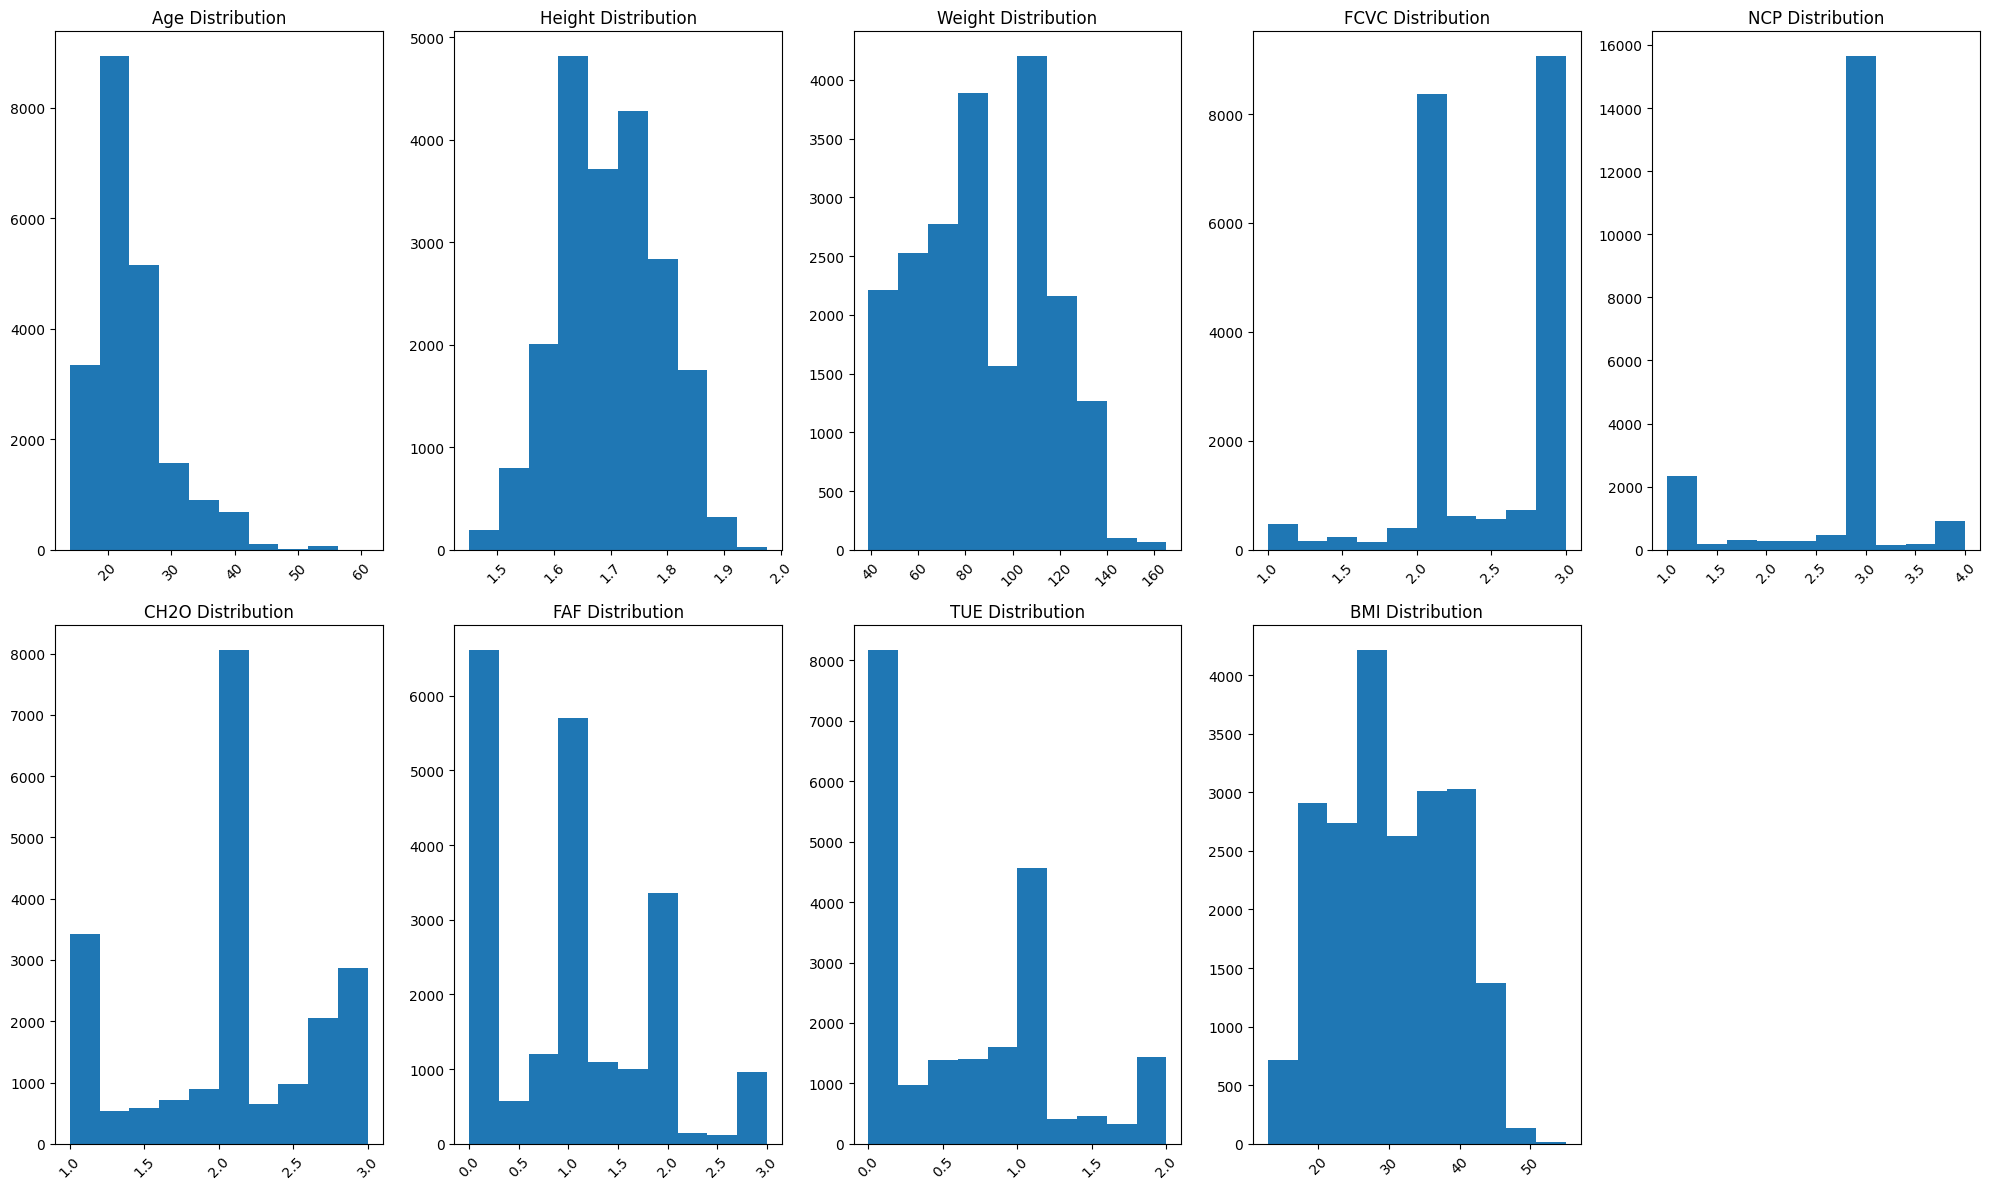

In [106]:
# numerical cols histogram
plt.figure(figsize=(20,6 * num_numerical_rows))
for i ,col in enumerate(numerical_cols,1):
    plt.subplot(num_numerical_rows, 5, i)
    plt.hist(df_train[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


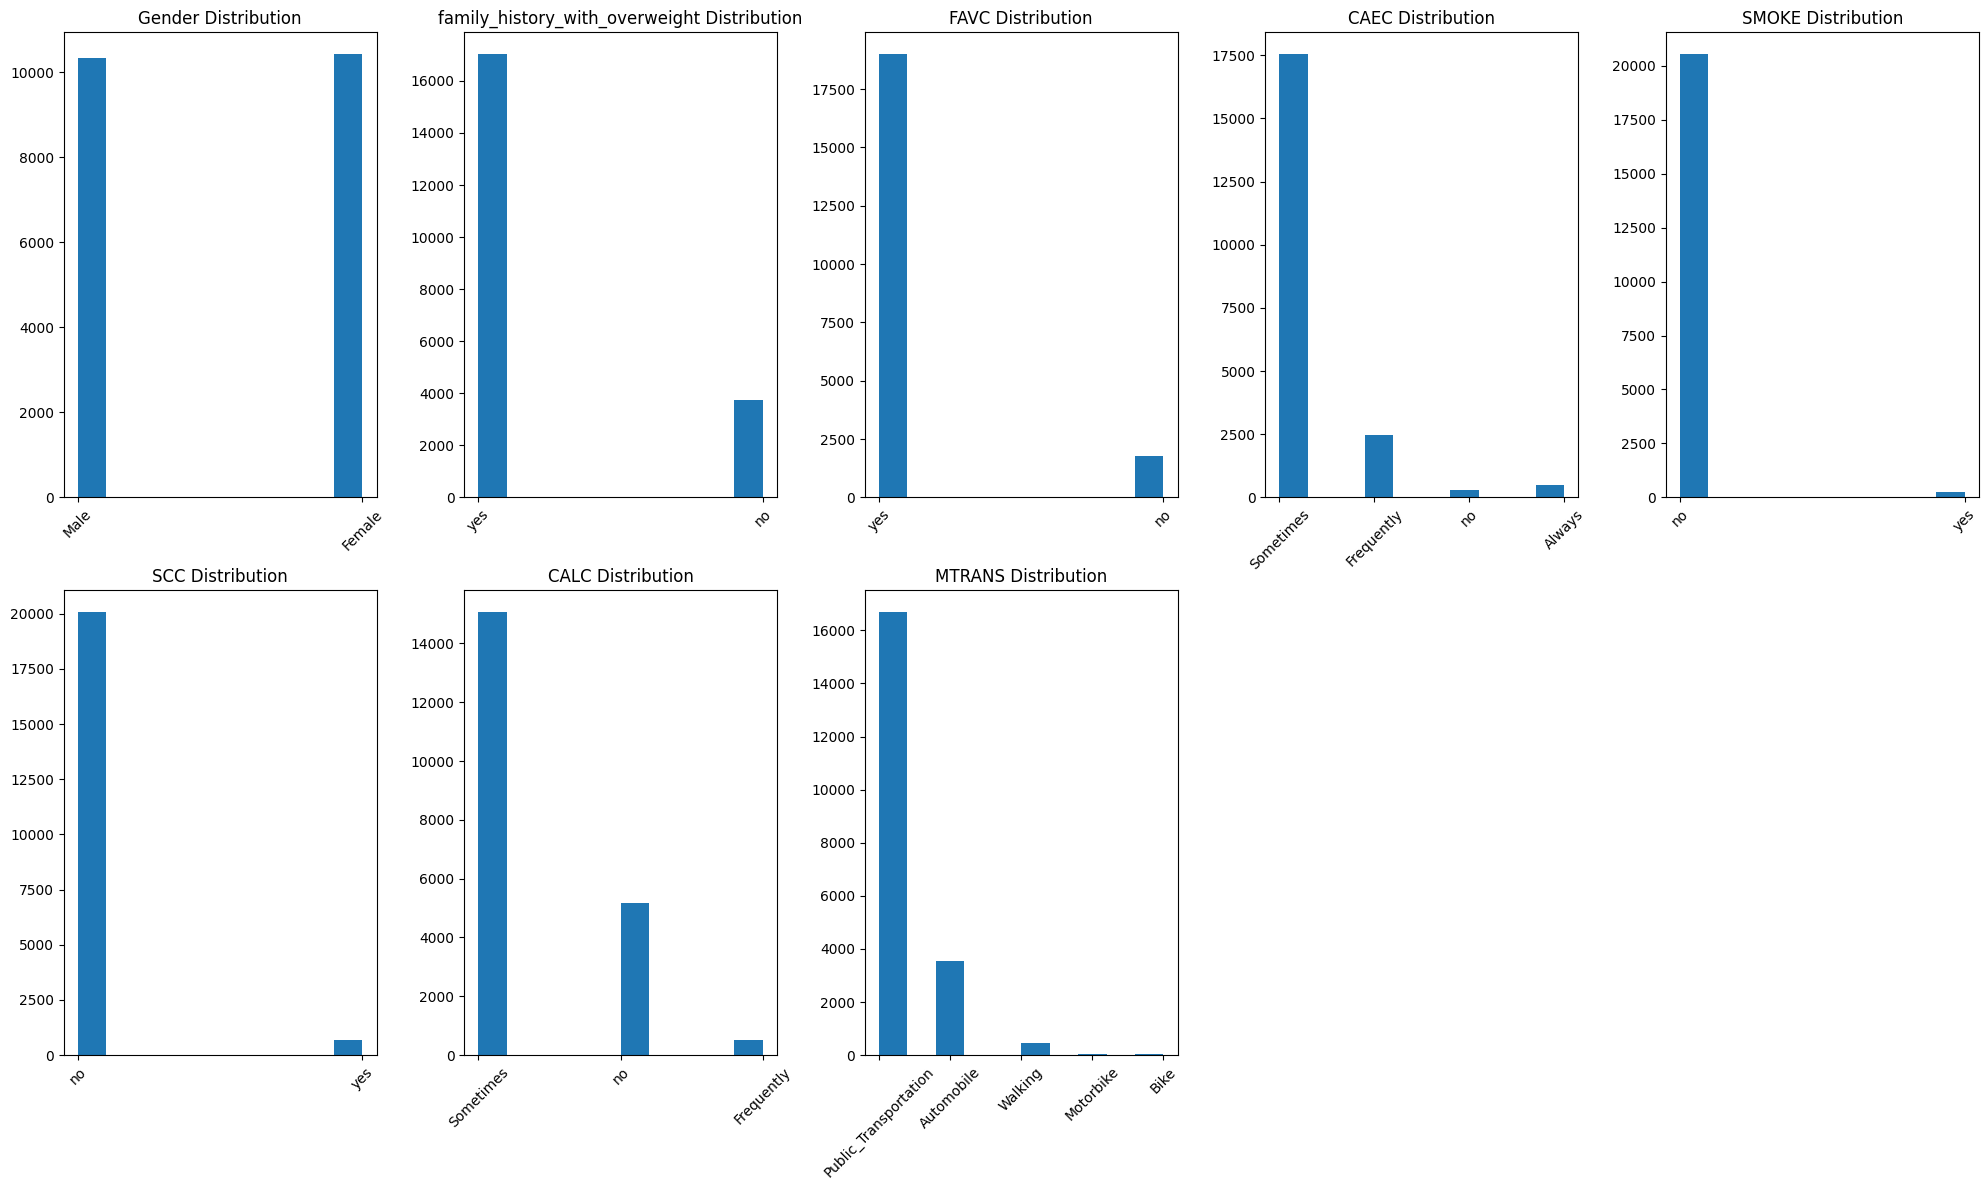

In [107]:
# categorical cols histogram
plt.figure(figsize=(20,6 * num_categorical_rows))
for i ,col in enumerate(categorical_cols,1):
    plt.subplot(num_categorical_rows, 5, i)
    plt.hist(df_train[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


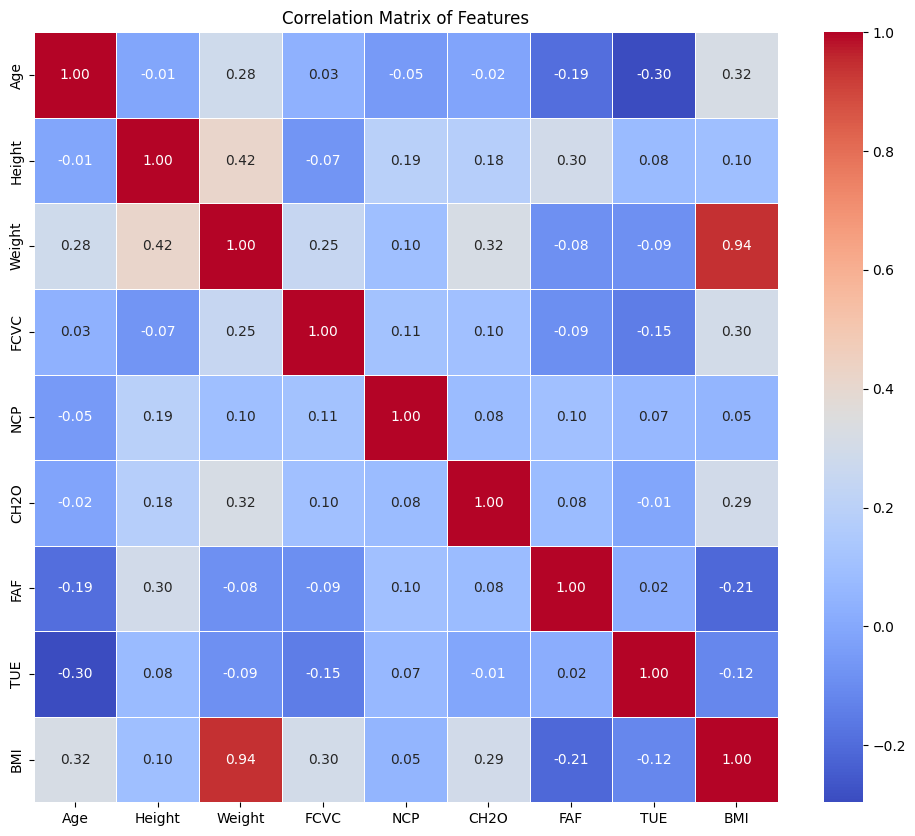

In [108]:
def corr(data):
    plt.figure(figsize=(12,10))
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f', linewidths= 0.5)
    plt.title('Correlation Matrix of Features')
corr(df_train[numerical_cols].corr())

## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier(ccp_alpha=0.01) - avoid overfitting
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [110]:
# do actual predictions
predictions = clf.predict(x_test)
predictions

array(['Overweight_Level_I', 'Obesity_Type_III', 'Obesity_Type_II', ...,
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_III'],
      shape=(4152,), dtype=object)

In [111]:
results = get_stats(predictions=predictions)
print(results)

{'acc_score': 0.839354527938343, 'prec_score': 0.826579745888473, 'recall_score': 0.8251165720948573, 'f1_score': 0.8253316621637167, 'confusion_matrix': array([[441,  60,   1,   0,   0,   5,   2],
       [ 46, 489,   2,   0,   0,  54,   5],
       [  0,   2, 480,  29,   4,  18,  45],
       [  0,   0,  48, 601,   1,   1,   6],
       [  0,   1,   2,   1, 781,   0,   0],
       [  6,  63,  21,   1,   1, 321,  67],
       [  2,  16,  64,   5,   0,  88, 372]])}


In [112]:
# check accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.839354527938343


In [113]:
# check accuracy
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions,labels=labels))

[[372  16   2   0   5  88  64]
 [  5 489  46   0   0  54   2]
 [  2  60 441   0   0   5   1]
 [  0   1   0 781   1   0   2]
 [  6   0   0   1 601   1  48]
 [ 67  63   6   1   1 321  21]
 [ 45   2   0   4  29  18 480]]


In [114]:
# check accuracy
from sklearn.metrics import precision_score

print(precision_score(y_test,predictions,average='macro')) # i don't know why macro

0.826579745888473


In [115]:
from sklearn.metrics import recall_score

recall_score(y_test, predictions,average='macro') # i don't know why macro

0.8251165720948573

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=labels))


                     precision    recall  f1-score   support

Overweight_Level_II       0.89      0.87      0.88       509
      Normal_Weight       0.77      0.82      0.80       596
Insufficient_Weight       0.78      0.83      0.80       578
   Obesity_Type_III       0.94      0.91      0.93       657
    Obesity_Type_II       0.99      0.99      0.99       785
 Overweight_Level_I       0.66      0.67      0.66       480
     Obesity_Type_I       0.75      0.68      0.71       547

           accuracy                           0.84      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.84      0.84      0.84      4152



In [117]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = x.columns).sort_values(0, ascending=False)
feature_importance

,0
BMI,0.588347
Weight,0.165137
Gender_Male,0.051132
Age,0.038528
CH2O,0.024203
Height,0.022808
FCVC,0.020662
FAF,0.018204
NCP,0.013805
TUE,0.012620


<Axes: >

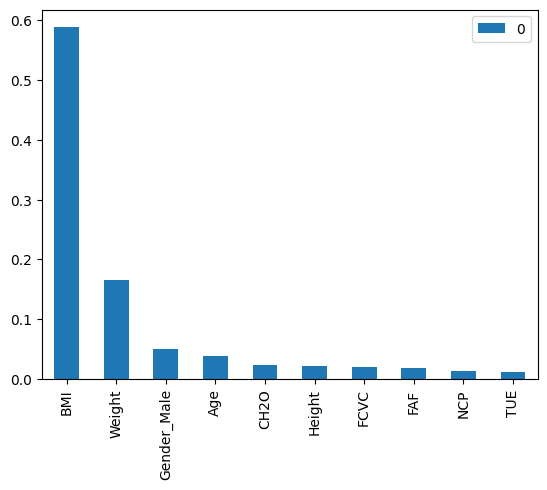

In [118]:
feature_importance.head(10).plot(kind='bar')

## K-Nearest Neighbors


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(x_train_scaled, y_train)

In [103]:
# do actual predictions
predictions = knn.predict(x_test_scaled)
predictions

array(['Obesity_Type_III', 'Normal_Weight', 'Normal_Weight', ...,
       'Obesity_Type_II', 'Normal_Weight', 'Normal_Weight'],
      shape=(4152,), dtype=object)

In [104]:
# check accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.7644508670520231


In [105]:
# check accuracy
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions,labels=labels))

[[281  66  12   0  10  76  57]
 [ 36 399 114   0   0  74  14]
 [  4  77 404   0   1   4   0]
 [  1   1   0 790   2   1   1]
 [ 11   1   0   0 625   1  31]
 [ 64 120  23   0   0 237  48]
 [ 56  14   2   5  32  19 438]]


In [106]:
# check accuracy
from sklearn.metrics import precision_score

print(precision_score(y_test,predictions,average='macro')) # i don't know why macro

0.7403078659754365


In [107]:
from sklearn.metrics import recall_score

recall_score(y_test, predictions,average='macro') # i don't know why macro

0.7418393987891628

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=labels))


                     precision    recall  f1-score   support

Overweight_Level_II       0.73      0.82      0.77       490
      Normal_Weight       0.59      0.63      0.61       637
Insufficient_Weight       0.74      0.77      0.76       566
   Obesity_Type_III       0.93      0.93      0.93       669
    Obesity_Type_II       0.99      0.99      0.99       796
 Overweight_Level_I       0.58      0.48      0.52       492
     Obesity_Type_I       0.62      0.56      0.59       502

           accuracy                           0.76      4152
          macro avg       0.74      0.74      0.74      4152
       weighted avg       0.76      0.76      0.76      4152



##  Support Vector Machines

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

{'acc_score': 0.8198458574181118, 'prec_score': 0.8066200689261481, 'recall_score': 0.8088125549811691, 'f1_score': 0.8060139697612154, 'confusion_matrix': array([[487,  21,   0,   0,   0,   0,   1],
       [ 98, 415,   0,   0,   0,  79,   4],
       [  0,   0, 476,  36,   9,   5,  52],
       [  0,   0,  41, 586,  26,   1,   3],
       [  0,   0,  15,  19, 750,   1,   0],
       [  6,  50,  10,   0,   0, 299, 115],
       [  0,  10,  55,   3,   0,  88, 391]])}


In [120]:
# modelGamma = SVC(gamma=10)
# modelLinearKernel = SVC(kernel='linear')
modelC = SVC(C=1000)
modelC.fit(x_train,y_train)
modelC.score(x_test,y_test)

0.8733140655105973